In [3]:
import pprint
import numpy as np
import scipy.linalg

number_time=10000;
mu=np.array([1 ,2,3])
sigma = np.array([[3 ,-1,1], [-1,5,3], [1,3,4]])
A = np.linalg.cholesky(sigma)

X=[];
x1=[];
x2=[];
x3=[];

for i in range(0,number_time):
    x=sum(np.transpose(A*np.random.normal(0, 1, 3)))+np.transpose(mu)
    X.append(x)
    x1.append(x[0])
    x2.append(x[1])  
    x3.append(x[2])
    
print(np.mean(x1))
print(np.mean(x2))
print(np.mean(x3))
print(np.cov(np.transpose(X)))


1.020381678927043
1.9830402135727105
2.9828664246526952
[[ 3.04187124 -1.02938443  1.00463437]
 [-1.02938443  5.04699378  3.02640755]
 [ 1.00463437  3.02640755  4.01554883]]


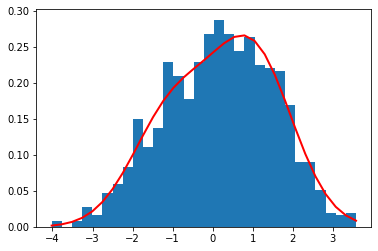

In [11]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
mu1, sigma1 = -1, 1 # mean and standard deviation of the two models
mu2, sigma2 = 1, 1
p = 0.4
s = np.zeros(N)


for i in range(N):
    if np.random.rand() < p:
        s[i] = np.random.normal(mu1, sigma1)
    else:
        s[i] = np.random.normal(mu2, sigma2)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, p*(1/(sigma1 * np.sqrt(2 * np.pi)) *
                  np.exp( - (bins - mu1)**2 / (2 * sigma1**2) )) + (1-p)*(1/(sigma2 * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu2)**2 / (2 * sigma2**2)) ),linewidth=2, color='r')
plt.show()

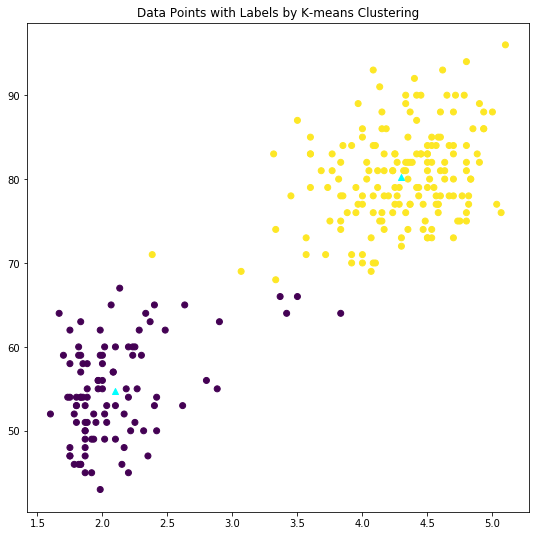

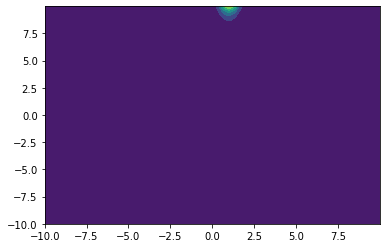

In [26]:
import numpy as np
from scipy import stats
from sklearn.utils import resample
import math
from random import random
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

file = open("data1.txt","r")
file2 = open("data2.txt","r")
a=95
#Repeat for each song in the text file
eruptions =[];
waiting=[];
for line in file:
    eruptions.append(float(line))
for line2 in file2:
    waiting.append(float(line2))
file.close()
file2.close()

X = np.vstack((eruptions, waiting)).T #Cascade data points
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(9, 9))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='^', c='cyan')

x1=X[:,0]*kmeans.labels_.astype(float)
y1=X[:,1]*kmeans.labels_.astype(float)
new_x=[];
new_y=[];
for i in range(len(x1)):
    if x1[i]!=float(0):
        new_x.append(x1[i])
        new_y.append(y1[i])

va=np.vstack((new_x,new_y))
cov1=np.cov(va)
new_x=[];
new_y=[];
for i in range(len(x1)):
    if x1[i]==float(0):
        new_x.append(eruptions[i])
        new_y.append(waiting[i])
va=np.vstack((new_x,new_y))
cov2=np.cov(va)

plt.title('Data Points with Labels by K-means Clustering')
plt.show()
mu1 = [kmeans.cluster_centers_[:,0][0] ,kmeans.cluster_centers_[:,1][0]      ]
mu2 = [kmeans.cluster_centers_[:,0][1],kmeans.cluster_centers_[:,1][1]]


rv1 = multivariate_normal(mu1, cov1)
rv2 = multivariate_normal(mu2, cov2)
plt.contourf(x, y, rv2.pdf(pos)+rv1.pdf(pos))
plt.show()

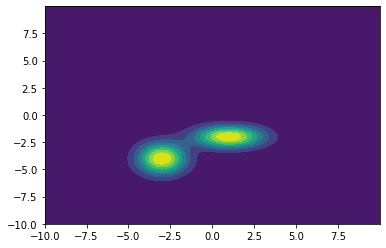

4.770795583724976
-1007.6672996199072


In [25]:
from scipy.stats import multivariate_normal as mvn
import scipy.stats as st
import time
np.random.seed(123)
start_mar = time.time()

# create data set
n = 300
mus = np.array([[1,-2], [-3,-4]])
sigmas = np.array([[[2, 0], [0, 0.5]], [[1,0],[0,1]]])
poba = np.array([0.25, 0.75])

x, y = np.mgrid[-10:10:.01, -10:10:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(mus[0], sigmas[0])
rv2 = multivariate_normal(mus[1], sigmas[1])
plt.contourf(x, y, rv2.pdf(pos)+rv1.pdf(pos))
plt.show()

xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(poba, mus, sigmas)])

# initial guesses for parameters
pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)
ll1, pis1, mus1, sigmas1 = em_gmm(xs, pis, mus, sigmas)
end_mar = time.time()
print(end_mar - start_mar)
print(ll1)
